In [55]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [56]:
hdu = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')
hdu.info()

Filename: gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [6]:
#this fits file contains 2 HDUs

In [57]:
hdu1 = hdu[0]
hdu1.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [65]:
answerList = ['30', 'photon energy', 'MeV', 'GLAST', 'MICHELSON']

In [59]:
img0 = hdu1.data[0]
print("Max =", np.max(img0))
print("Min =", np.min(img0))
print("Std dev =", np.std(img0))

Max = 4.5921523e-05
Min = 7.027717e-08
Std dev = 1.3843595e-06


In [60]:
plt.rcParams['figure.figsize'] = [12,8]

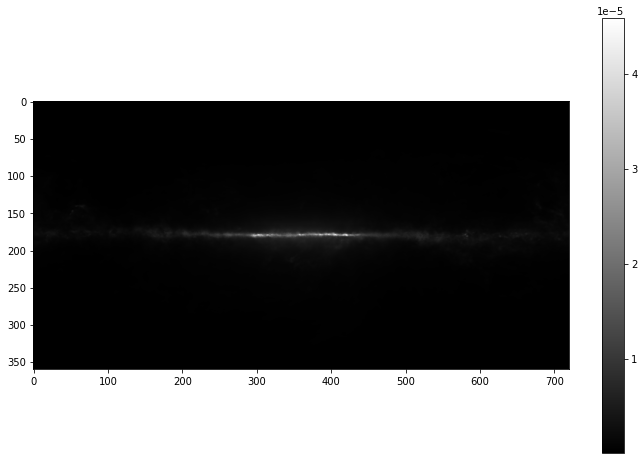

In [61]:
plt.imshow(img0, cmap='gray', vmin = np.min(img0), vmax = np.max(img0))
plt.colorbar()

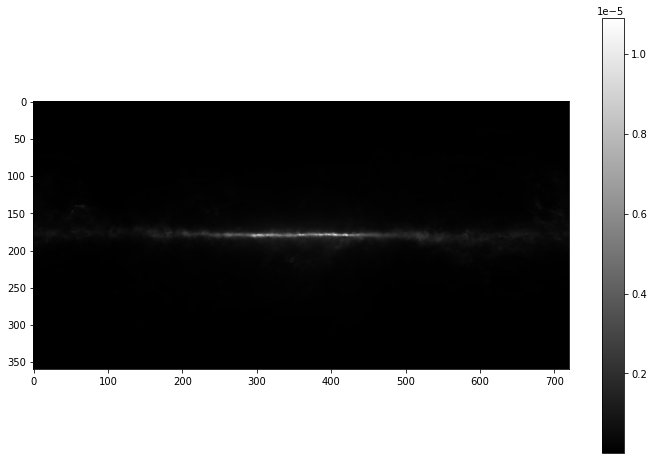

In [62]:
stack = np.zeros((360, 720))
for i in range(6) :
    stack += hdu1.data[i*5+4]

plt.imshow(stack, cmap='gray', vmin = np.min(stack), vmax = np.max(stack))
plt.colorbar()

In [63]:
iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)

In [67]:
def Altitude (coordinates, time) :
    times = np.linspace(0, 12, 100)
    newcoords = coordinates.transform_to(AltAz(obstime=time+times*u.hour, location=iitm))
    plt.plot(times, newcoords.alt)
    plt.xlabel("Time since observation (Hours)")
    plt.ylabel("Altitude (Degs)")
    plt.show()
    return

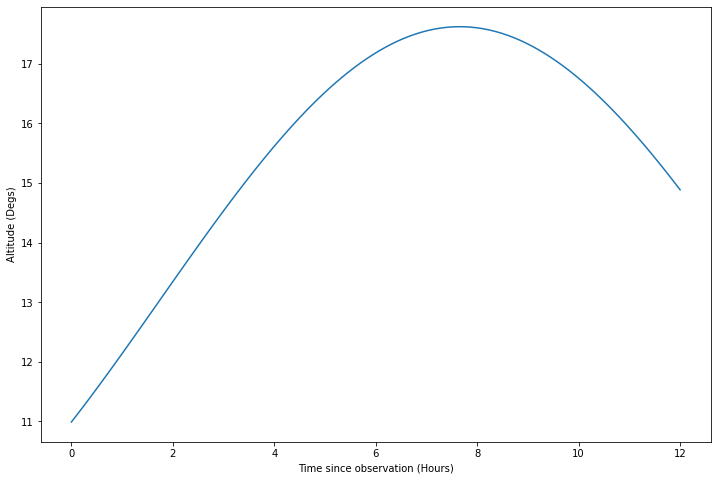

In [68]:
#example
time1 = Time('2021-7-11 22:00:00') - 5.5*u.hour
Altitude(SkyCoord(12.11*u.deg, 85.26*u.deg), time1);